In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

### 2015-2016 NBA Season Totals

In [2]:
df = pd.read_csv('NBA_16.csv')

In [3]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,PF,25,SAC,59,29,876,119,214,...,0.735,65,123,188,27,29,24,27,103,307
1,2,Jordan Adams,SG,21,MEM,2,0,15,2,6,...,0.600,0,2,2,3,3,0,2,2,7
2,3,Steven Adams,C,22,OKC,80,80,2014,261,426,...,0.582,219,314,533,62,42,89,84,223,636
3,4,Arron Afflalo,SG,30,NYK,71,57,2371,354,799,...,0.840,23,243,266,144,25,10,82,142,909
4,5,Alexis Ajinça,C,27,NOP,59,17,861,150,315,...,0.839,75,194,269,31,19,36,54,134,352


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      500 non-null    int64  
 1   Player  500 non-null    object 
 2   Pos     500 non-null    object 
 3   Age     500 non-null    int64  
 4   Tm      500 non-null    object 
 5   G       500 non-null    int64  
 6   GS      500 non-null    int64  
 7   MP      500 non-null    int64  
 8   FG      500 non-null    int64  
 9   FGA     500 non-null    int64  
 10  FG%     498 non-null    float64
 11  3P      500 non-null    int64  
 12  3PA     500 non-null    int64  
 13  3P%     457 non-null    float64
 14  2P      500 non-null    int64  
 15  2PA     500 non-null    int64  
 16  2P%     493 non-null    float64
 17  eFG%    498 non-null    float64
 18  FT      500 non-null    int64  
 19  FTA     500 non-null    int64  
 20  FT%     478 non-null    float64
 21  ORB     500 non-null    int64  
 22  DR

In [5]:
df.shape

(500, 30)

### Determining the Players with Outlier 3 Point Shooting

3P: 3 Pointers Made & 3P%: - Accuracy of 3 Pointers

In [6]:
columns = ['Player', '3P', '3P%']

In [7]:
data = df[columns]

#Drop NaN
data = data.dropna()

#Keep Players that made atleast one 3 Pointer
#data = data[data['3P'] != 0]

#Ranked based on 3 Pointers Made in the season
data_final = data.sort_values('3P', ascending=False, ignore_index=True)
data_final

,Player,3P,3P%
0,Stephen Curry,402,0.454
1,James Harden,236,0.359
2,Damian Lillard,229,0.375
3,Kyle Lowry,212,0.388
4,Paul George,210,0.371
...,...,...,...
452,Joakim Noah,0,0.000
453,Tim Duncan*,0,0.000
454,Derrick Favors,0,0.000
455,Cristiano Felício,0,0.000


### Feature Selection

In [8]:
features = data_final[['3P', '3P%']] 

### One-Class SVM: Outlier Detection

In [9]:
svm = OneClassSVM(kernel = 'rbf', gamma = 0.00001, nu=0.03).fit(features)

In [10]:
predict = svm.predict(features)
predict

array([-1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [11]:
np.unique(predict, return_counts=True)

(array([-1,  1], dtype=int64), array([  7, 450], dtype=int64))

### Result: 7 Outliers

In [12]:
data_final['label'] = predict

### Instance of a Non-Outlier

In [13]:
data_final[data_final['Player'] == 'Blake Griffin']

,Player,3P,3P%,label
318,Blake Griffin,6,0.333,1


Horrible 3 Point Shooter but a non-outlier nonetheless

### Instance of an Outlier

In [14]:
data_final[data_final['Player'] == 'Stephen Curry']

,Player,3P,3P%,label
0,Stephen Curry,402,0.454,-1


Exceptional 3 point shooting in terms volume to accuracy ratio and an outlier.

In [15]:
non_outliers_data = data_final[data_final['label'] == 1]

In [16]:
outliers_data = data_final[data_final['label'] == -1]

Text(0.34299999999999997, 6, 'Blake Griffin')

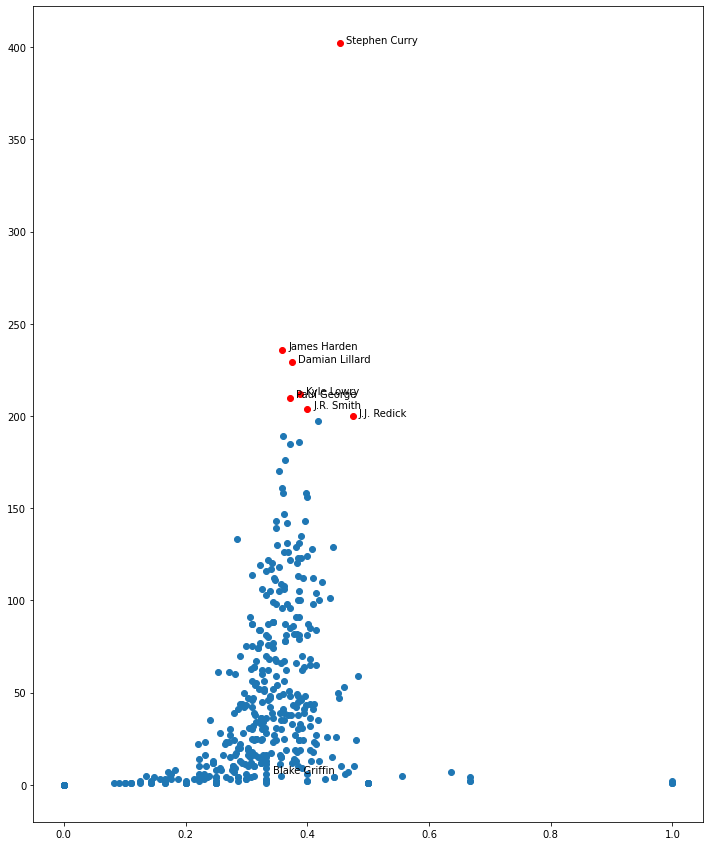

In [17]:
plt.figure(figsize=(12, 15))
plt.scatter(outliers_data['3P%'], outliers_data['3P'], c = "r")
plt.scatter(non_outliers_data['3P%'], non_outliers_data['3P'])

#Label of Outliers and BG
for i , txt in enumerate(outliers_data['Player']):
    plt.annotate(txt, (features['3P%'][i] + 0.01, features['3P'][i]))
    
plt.annotate('Blake Griffin', (features['3P%'][318] + 0.01, features['3P'][318]))

In [18]:
data_final[data_final['3P%'] == 1]

,Player,3P,3P%,label
355,Coty Clarke,2,1.0,1
374,Jimmer Fredette,1,1.0,1
376,Andrew Bogut,1,1.0,1
399,Johnny O'Bryant,1,1.0,1


A handful of players have perfect accuracy but low made shots so they are likely ignored by the detector.